# Preprocessing
Preprocess tweets for sentiment analysis. 
Using the NLTK package to perfrom a preprocessing pipeline for Twitter datasets.
* Tokenizing tweet strings 
* Lowercasing
* Removing hyperlinks, twitter marks and hashtags
* Removing stop words and punctiuation
* Stemming

In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import pprint
import string

In [2]:
# Downloads sample twitter dataset
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/d062562/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
# loads positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

print("Type: ", type(positive_tweets))
print("Tweet data type: ", type(positive_tweets[0]))
print("\nCount of positive tweets: ", len(positive_tweets))
print("Count of negative tweets: ", len(negative_tweets))

Type:  <class 'list'>
Tweet data type:  <class 'str'>

Count of positive tweets:  5000
Count of negative tweets:  5000


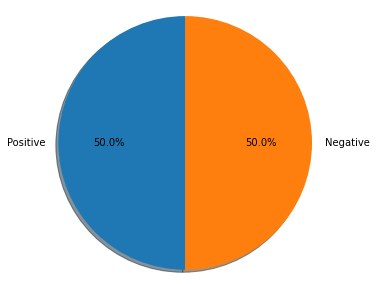

In [4]:
# Pie chart visualization of the dataset
fig = plt.figure(figsize=(5, 5))

labels = ['Positive', 'Negative']
sizes = [len(positive_tweets), len(negative_tweets)]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, shadow=True)

plt.axis("equal")

plt.show()

In [5]:
# print raw tweets
print("\033[92m" + positive_tweets[2277])
print("\n\033[91m" + negative_tweets[2277])

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

okay she doesnt want to talk to me then I will stop :(


In [6]:
# removes "RT" (reply in old style Twitter tweets)
# removes hyperlinks
# removes # (hash) sign

tweet = positive_tweets[2277]

tweet2 = re.sub(r'^RE\s+', '', tweet)

print(tweet2)

tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
tweet2 = re.sub('\#', '', tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [7]:
# tokenizes the string, lowercasing it
tknzr = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
tokens = tknzr.tokenize(tweet2)
pprint.pprint(tokens)

['my',
 'beautiful',
 'sunflowers',
 'on',
 'a',
 'sunny',
 'friday',
 'morning',
 'off',
 ':)',
 'sunflowers',
 'favourites',
 'happy',
 'friday',
 'off',
 '…']


In [8]:
# download the english stopwords list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/d062562/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# removes stop words and punctuation
# stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

filtered_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and token not in string.punctuation]
print(filtered_tokens)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [10]:
from utils import process_tweet

print(process_tweet(tweet))

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
